<a href="https://colab.research.google.com/github/atloveu1226/CMIT2024/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.CIFAR10(root='data',
                            train=True,
                            transform=ToTensor(),
                             download=True)
test_data = datasets.CIFAR10(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download=True
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:01<00:00, 97327251.68it/s] 


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [3]:
import torch
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x79b7eeda38e0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x79b7eeda38b0>}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

image shape: torch.Size([3, 32, 32])
image shape: torch.Size([32, 32, 3])
label is 5
corresponding class is: dog


Text(0.5, 1.0, 'dog')

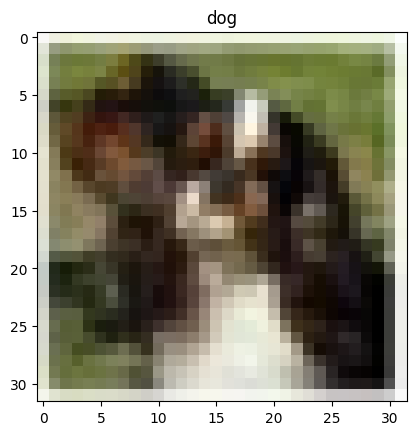

In [4]:
# Plot an image with the class

i=500# change index
im, label = train_data[i]
print('image shape:' , im.shape)
im = np.transpose(im, [1,2,0])
print('image shape:' , im.shape)
print('label is', label)
print('corresponding class is:', classes[label])
plt.imshow(im)
plt.title(classes[train_data.targets[i]])

In [5]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x79b8c3f23a00>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x79b7eeddd7b0>}

In [6]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=(3,3),padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=(3,3),padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2))
        )

        self.HiddenFinal1 = nn.Linear(8*8*16,120)
        self.HiddenFinal2 = nn.Linear(120,84)
        self.HiddenFinal3 = nn.Linear(84,10)
        #self.CrossEntropyLoss = nn.CrossEntropyLoss()


    def forward(self, x,plot=False):

        x1 = self.conv1(x)
        x2 = self.conv2(x1)

        x2b = x2.view(x2.size(0), -1)
        x3 = self.HiddenFinal1(x2b)
        x4 = self.HiddenFinal2(x3)
        x5 = self.HiddenFinal3(x4)
        #x6 = self.CrossEntropyLoss(x5)


        if plot:
            print('Input shape', x.shape)
            print('After layer 1', x1.shape)
            print('After layer 2', x2.shape)
            print('After layer 3', x3.shape)
            print('After layer 4', x4.shape)
            print('After layer 5', x5.shape)
            #print('After layer 6', x6.shape)



        return x5

model = CNN()
print(model)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (HiddenFinal1): Linear(in_features=1024, out_features=120, bias=True)
  (HiddenFinal2): Linear(in_features=120, out_features=84, bias=True)
  (HiddenFinal3): Linear(in_features=84, out_features=10, bias=True)
)


Visualize the convolutional neutral network

In [8]:
#Look at layers
im,label = train_data[0]
im = im.unsqueeze(0)

print(im.shape)


output = model(im,plot=True)

torch.Size([1, 3, 32, 32])
Input shape torch.Size([1, 3, 32, 32])
After layer 1 torch.Size([1, 6, 16, 16])
After layer 2 torch.Size([1, 16, 8, 8])
After layer 3 torch.Size([1, 120])
After layer 4 torch.Size([1, 84])
After layer 5 torch.Size([1, 10])


In [9]:
#optimizer

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

loss_func = nn.CrossEntropyLoss()

In [23]:
from torch.autograd import Variable
# Train:
num_epochs = 10

def train(num_epochs, model, loaders):

    model.train()

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):
            # images is of size [batch_size, 28, 28]


            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y

            output = model(b_x)#[0]


            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()                # apply gradients
            optimizer.step()

            if (i+1) % 250 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                       .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))



train(num_epochs, model, loaders)

Epoch [1/10], Step [250/500], Loss: 1.5992
Epoch [1/10], Step [500/500], Loss: 1.6421
Epoch [2/10], Step [250/500], Loss: 1.4744
Epoch [2/10], Step [500/500], Loss: 1.7202
Epoch [3/10], Step [250/500], Loss: 1.5369
Epoch [3/10], Step [500/500], Loss: 1.4519
Epoch [4/10], Step [250/500], Loss: 1.5290
Epoch [4/10], Step [500/500], Loss: 1.6594
Epoch [5/10], Step [250/500], Loss: 1.6201
Epoch [5/10], Step [500/500], Loss: 1.5205
Epoch [6/10], Step [250/500], Loss: 1.3411
Epoch [6/10], Step [500/500], Loss: 1.4492
Epoch [7/10], Step [250/500], Loss: 1.4548
Epoch [7/10], Step [500/500], Loss: 1.3708
Epoch [8/10], Step [250/500], Loss: 1.3456
Epoch [8/10], Step [500/500], Loss: 1.5239
Epoch [9/10], Step [250/500], Loss: 1.3122
Epoch [9/10], Step [500/500], Loss: 1.4342
Epoch [10/10], Step [250/500], Loss: 1.3785
Epoch [10/10], Step [500/500], Loss: 1.4963


In [24]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loaders['test']:
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(loaders['test'].dataset)
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(loaders['test'].dataset),
          100. * correct / len(loaders['test'].dataset)))
test()


Test set: Avg. loss: -2.4368, Accuracy: 5012/10000 (50%)



Display some results

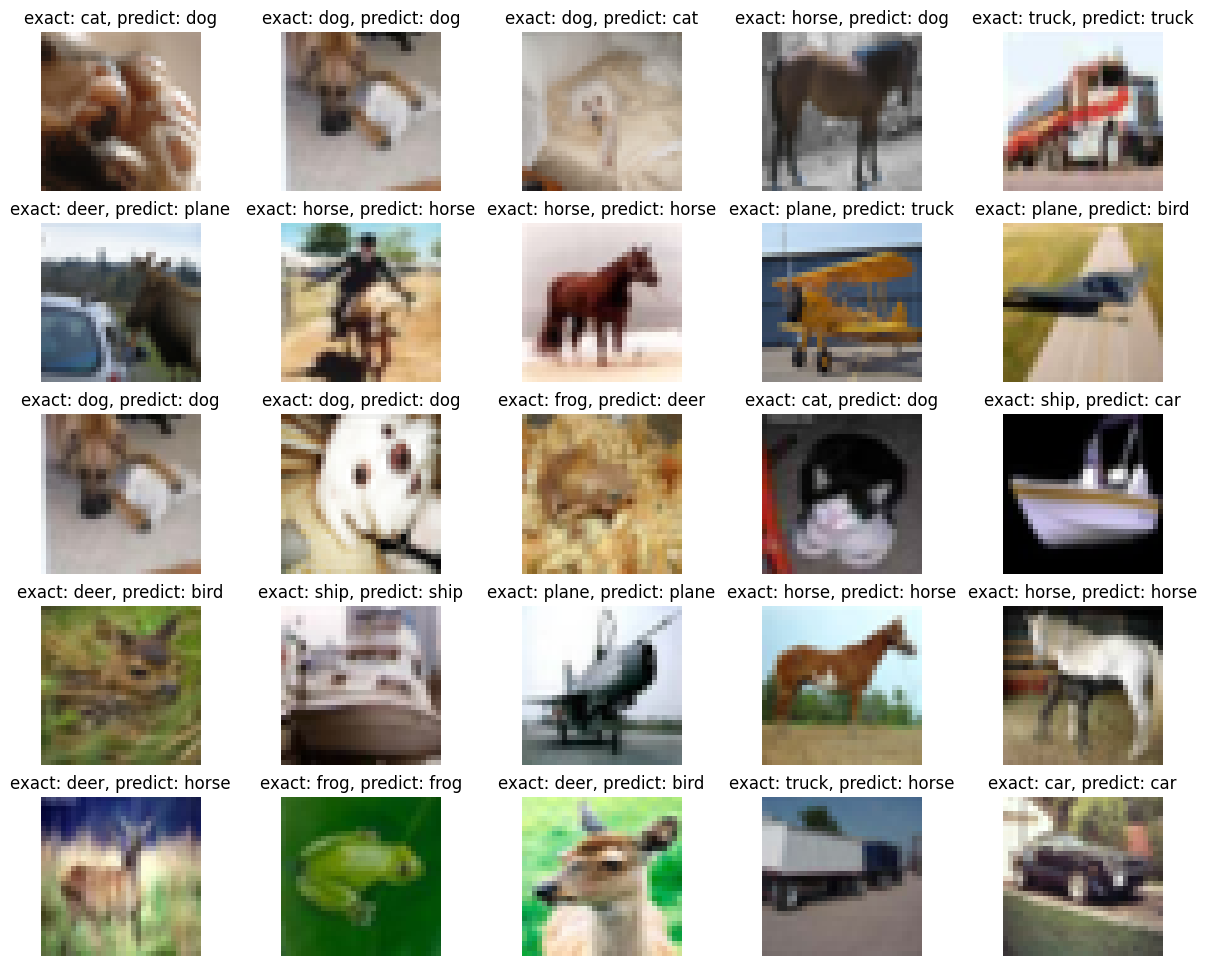

In [35]:
#Plot multiple
figure = plt.figure(figsize=(15, 12))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(test_data), size=(1,)).item()
        img, label = test_data[sample_idx]

        img_display = img.permute(1, 2, 0).squeeze().numpy()
        img_tensor = img.unsqueeze(0)

        output = model(img_tensor)
        pred_y = torch.max(output, 1)
        pred_label = pred_y[1].item()

        figure.add_subplot(rows, cols, i)
        plt.title(f'exact: {classes[label]}, predict: {classes[pred_label]}')
        plt.axis("off")
        plt.imshow(img_display, cmap="gray")


plt.show()